<a href="https://colab.research.google.com/github/Galatonic-rebel/BDBN/blob/main/Aves_barn_swallow_contact_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Network - Aves-barn-swallow-contact-network
  @inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={http://networkrepository.com},
      year={2015}
  }

In [28]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as stats

In [5]:
G = nx.read_weighted_edgelist('/content/aves-barn-swallow-contact-network.edges', nodetype=int)

In [8]:
print("Nodes of Graph:", G.nodes())
print("Edges of Graph:", G.edges())
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())

Nodes of Graph: [1, 2, 3, 4, 10, 14, 15, 16, 17, 6, 7, 8, 13, 5, 9, 12, 11]
Edges of Graph: [(1, 2), (1, 3), (1, 4), (1, 10), (1, 14), (1, 15), (1, 16), (1, 17), (2, 3), (2, 6), (2, 7), (2, 8), (2, 10), (2, 13), (2, 14), (2, 15), (2, 17), (3, 5), (3, 6), (3, 7), (3, 9), (3, 15), (3, 16), (4, 17), (4, 15), (10, 5), (10, 6), (10, 9), (10, 12), (10, 14), (10, 15), (10, 16), (14, 5), (14, 12), (14, 16), (14, 17), (15, 5), (15, 6), (15, 8), (15, 13), (15, 17), (16, 12), (16, 17), (17, 5), (17, 6), (17, 7), (17, 8), (17, 13), (8, 5), (13, 5), (5, 9), (5, 12), (9, 11)]
Number of nodes: 17
Number of edges: 53


In [9]:
for i in G.nodes():
  print("Degree of node", str(i), G.degree[i])

Degree of node 1 8
Degree of node 2 10
Degree of node 3 8
Degree of node 4 3
Degree of node 10 9
Degree of node 14 7
Degree of node 15 10
Degree of node 16 6
Degree of node 17 11
Degree of node 6 5
Degree of node 7 3
Degree of node 8 4
Degree of node 13 4
Degree of node 5 9
Degree of node 9 4
Degree of node 12 4
Degree of node 11 1


[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Degree Distribution')]

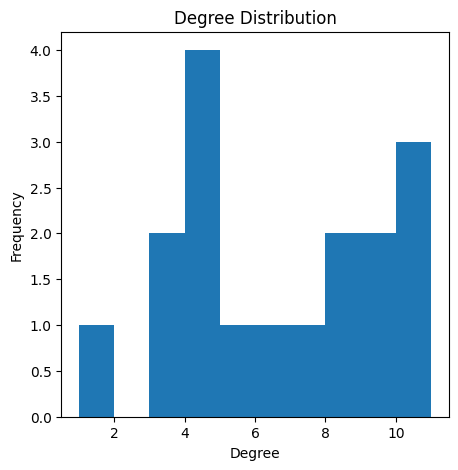

In [14]:
#Plotting degree distribution N(k) vs k
list_degree=[G.degree(i) for i in G.nodes]
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.hist(list_degree)
ax.set(xlabel="Degree", ylabel="Frequency", title="Degree Distribution")

[0 1 0 2 4 1 1 1 2 2 2 1]
[ 1  3  4  5  6  7  8  9 10 11]
[1 2 4 1 1 1 2 2 2 1]


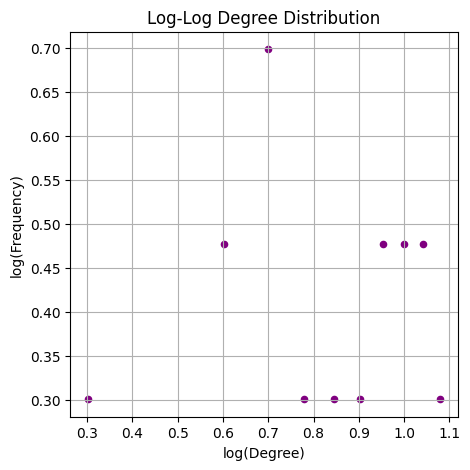

In [24]:
#Plotting log(N(k)) vs log(k)
list_degree = [G.degree(i) for i in G.nodes]

#Counts of each degree
degree_counts = np.bincount(list_degree)
print(degree_counts)

#Getting the nodes with non zero degrees
k_values = np.nonzero(degree_counts)[0]
print(k_values)

#The degrees associated with nodes
N_k = degree_counts[k_values]
print(N_k)

#Converting to log scale
log_k = np.log10(k_values+1)
log_Nk = np.log10(N_k + 1)

#Plotting log-log distribution
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(log_k, log_Nk, color='purple', s=20)
ax.set(xlabel="log(Degree)", ylabel="log(Frequency)", title="Log-Log Degree Distribution")
ax.grid(True)

plt.show()


In [33]:
#Spearman correlation
Spearman_corr, p_value = stats.spearmanr(log_k, log_Nk)
print(f"Spearman correlation coefficient: {Spearman_corr:.4f}")
print(f"p-value: {p_value:.4f}")

Spearman correlation coefficient: 0.0067
p-value: 0.9853


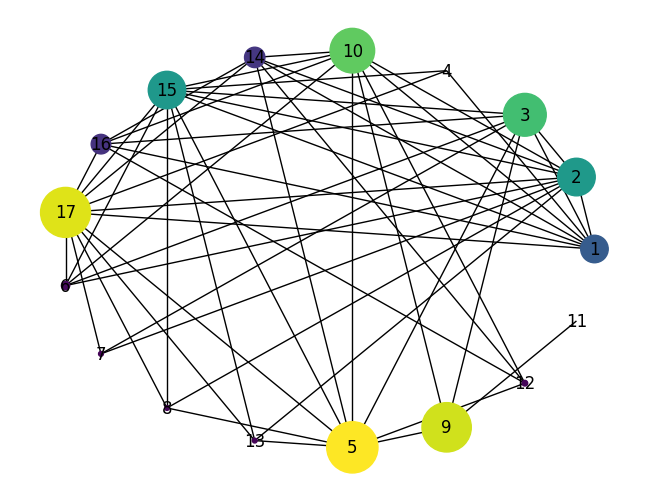

In [67]:
bc_values = nx.betweenness_centrality(G)
nx.draw(G, nx.circular_layout(G),with_labels=True,
        node_size=[i*10000 for i in bc_values.values()],
        node_color=list(bc_values.values()),cmap='viridis' )